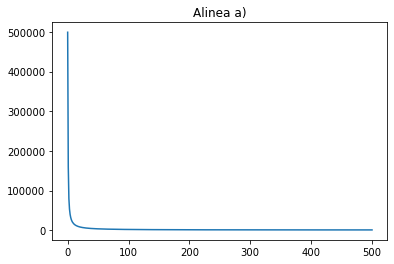

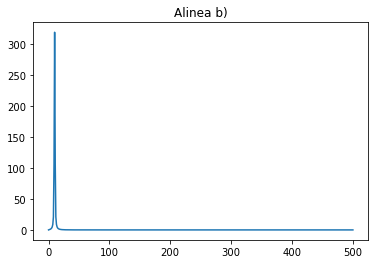

In [27]:
#Exercício 1
from numpy import exp, arange, pi, zeros,linspace, ones, sin
from pylab import plot,show, title

#função para determinar os coeficientes de uma tranformação discreta de Fourier
def dft(y):
	N = len(y)
	c = zeros(N//2 +1,complex)
	n = arange(0,N)
	for k in range(N//2 + 1):
		c[k] = sum(y*exp(-1j*2*pi*k*n/N))
	
	return c


N = 1000

#alínea a)

y2 = arange(N)
c2 = dft(y2)
plot(abs(c2))
title("Alinea a)")
show()

#alínea b)

n = arange(N)
y3 = sin(pi*n/N)*sin(20*pi*n/N)
c3 = dft(y3)
plot(abs(c3))
title("Alinea b)")
show()

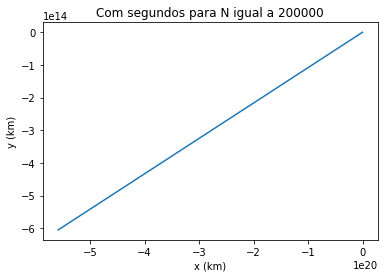

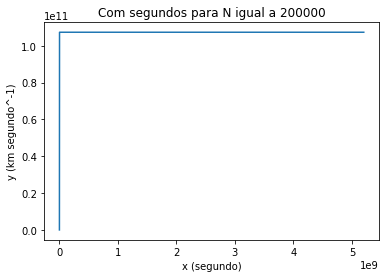

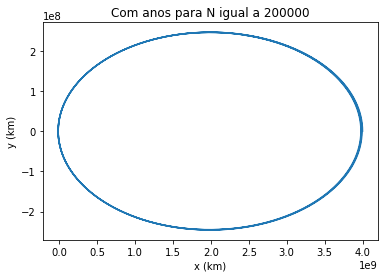

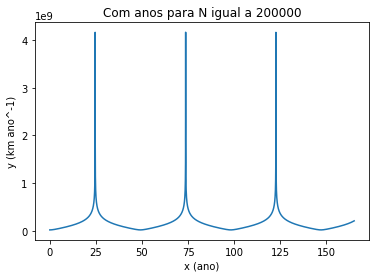

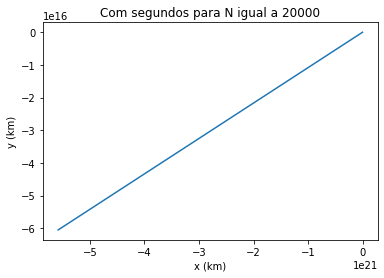

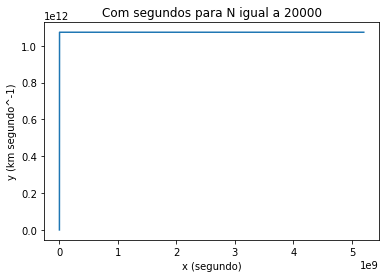

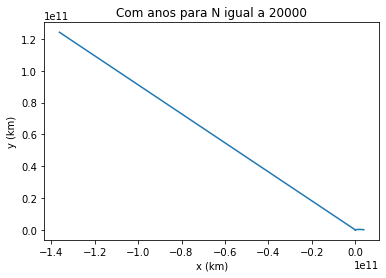

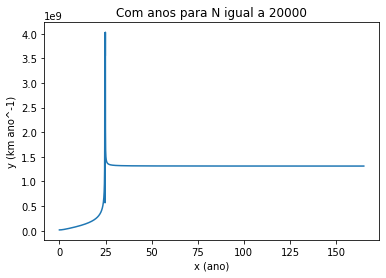

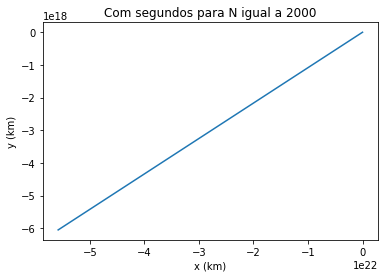

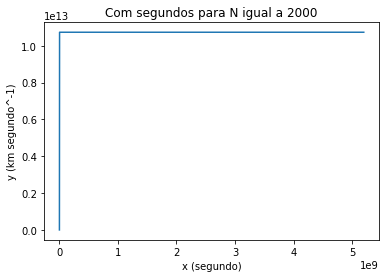

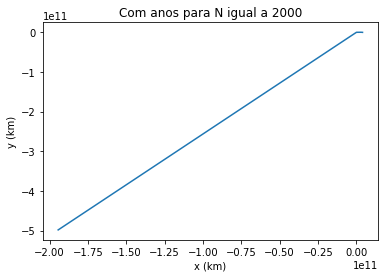

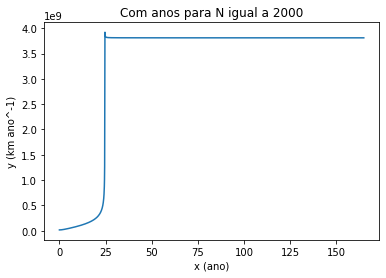

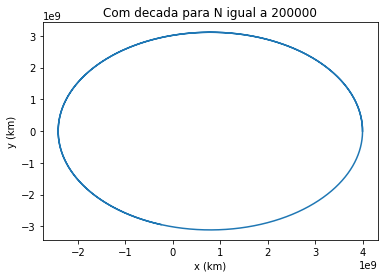

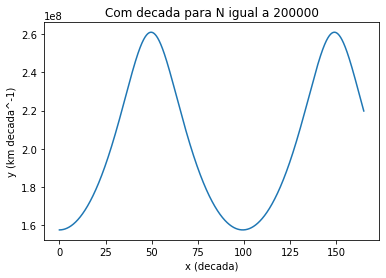

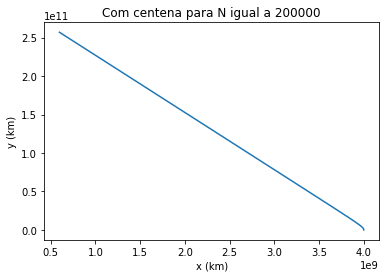

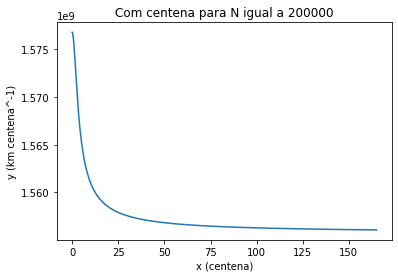

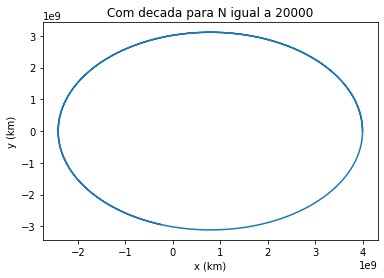

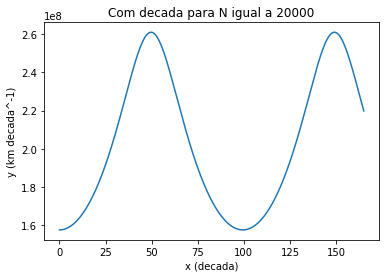

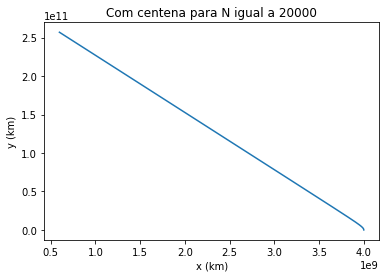

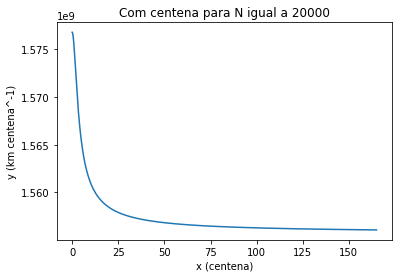

In [6]:
#Exercício 2
from numpy import array, arange, sqrt, power
from pylab import plot, show, xlabel, ylabel, title



def f(r, t):
    #constantes 2
    m_sun = 1.989 * 10 ** 30
    G = 66374.2
    x = r[0]
    vx = r[1]
    y = r[2]
    vy = r[3]
    dist = sqrt(x ** 2 + y ** 2)
    return array([vx, - G * m_sun * x / dist ** 3, vy, - G * m_sun * y / dist ** 3], float)

def g(N):
    x_0 = 4 * 10 ** 12
    y_0 = 0
    v_x = 0 #m segundo^-1
    v_y = 500 #m segundo^-1
    t_0 = 0 # segundo
    t_f = 5.203 * 10 **9  # segundo
    h = (t_f - t_0) / N
    tpoints = arange(t_0, t_f, h)
    xpoints = []
    ypoints = []
    vpoints = []
    r = array([x_0, v_x, y_0, v_y], float)
    for t in tpoints:
        v=sqrt(r[1] ** 2 + r[3] ** 2)
        xpoints.append(r[0])
        ypoints.append(r[2])
        vpoints.append(v)
        k1 = h * f(r, t)
        k2 = h * f(r + 0.5 * k1, t + 0.5 * h)
        k3 = h * f(r + 0.5 * k2, t + 0.5 * h)
        k4 = h * f(r + k3, t + h)
        r += (k1 + 2 * k2 + 2 * k3 + k4) / 6

    plot(array(xpoints, float) / 1000, array(ypoints, float) / 1000)
    title("Com segundos para N igual a " + str(N))
    xlabel('x (km)')
    ylabel('y (km)')
    show()
    plot(array(tpoints, float), array(vpoints, float)/1000)
    title("Com segundos para N igual a " + str(N))
    xlabel('x (segundo)')
    ylabel('y (km segundo^-1)')
    show()

def g_2(N):
    x_0 = 4 * 10 ** 12
    y_0 = 0
    v_x = 0 #m ano^-1
    v_y = 15768000000 #m ano^-1
    t_0 = 0 # anos
    t_f = 165  # anos
    h = (t_f - t_0) / N
    tpoints = arange(t_0, t_f, h)
    xpoints = []
    ypoints = []
    vpoints = []
    r = array([x_0, v_x, y_0, v_y], float)
    for t in tpoints:
        v=sqrt(r[1] ** 2 + r[3] ** 2)
        xpoints.append(r[0])
        ypoints.append(r[2])
        vpoints.append(v)
        k1 = h * f(r, t)
        k2 = h * f(r + 0.5 * k1, t + 0.5 * h)
        k3 = h * f(r + 0.5 * k2, t + 0.5 * h)
        k4 = h * f(r + k3, t + h)
        r += (k1 + 2 * k2 + 2 * k3 + k4) / 6

    plot(array(xpoints, float) / 1000, array(ypoints, float) / 1000)
    title("Com anos para N igual a " + str(N))
    xlabel('x (km)')
    ylabel('y (km)')
    show()
    plot(array(tpoints, float), array(vpoints, float)/1000)
    title("Com anos para N igual a " + str(N))
    xlabel('x (ano)')
    ylabel('y (km ano^-1)')
    show()

g(200000)
#primeiro fiz para segundos, mas para um N=200000  não consegui a função pretendida
#para nenhum dos gráficos pretendidos, porque o N era muito pequeno.

g_2(200000)

#Sendo assim mudei para anos para podermos ter um N menor e usando o mesmo N conseguimos
#obter os gráficos pretendidos 

# Agora fui tentear para um N maior para segundos fazendo que como um ano é aproximandamente
#igual a 3.154*10**7 segundos então fiz o N em que conseguimos obter resultados vezes
#o valor de um segundo no ano
#u=200000*3.154*10**7
#g(u)

#obtivemos um erro que indica que é impossível devido ao número de passos, sendo assim
#possívelmente nunca conseguimos obter um os gráficos pretendidos para segundos e a 
#aposta para anos foi a melhor

#mesmo usando o "fourth-order Runge-Kutta method" este processo é muito lento, pois
#requere muito passos para termos uma função. exemplo para menores passos tenho a seguir



g(20000)
g_2(20000)
g(2000)
g_2(2000)

#no qual não obtivemos os gráficos esperados. verfiquei para o outro tbm e não obtive
#o resultado esperado o que era esperado.

#vou esperar aumentar para decada e centana (?) como base e obtive os seguinte 
#resultados:

def g_3(N):
    x_0 = 4 * 10 ** 12
    y_0 = 0
    v_x = 0 #m ano^-1
    v_y = 15768000000*10 #m decada^-1
    t_0 = 0 # decada
    t_f = 165  # decada
    h = (t_f - t_0) / N
    tpoints = arange(t_0, t_f, h)
    xpoints = []
    ypoints = []
    vpoints = []
    r = array([x_0, v_x, y_0, v_y], float)
    for t in tpoints:
        v=sqrt(r[1] ** 2 + r[3] ** 2)
        xpoints.append(r[0])
        ypoints.append(r[2])
        vpoints.append(v)
        k1 = h * f(r, t)
        k2 = h * f(r + 0.5 * k1, t + 0.5 * h)
        k3 = h * f(r + 0.5 * k2, t + 0.5 * h)
        k4 = h * f(r + k3, t + h)
        r += (k1 + 2 * k2 + 2 * k3 + k4) / 6

    plot(array(xpoints, float) / 1000, array(ypoints, float) / 1000)
    title("Com decada para N igual a " + str(N))
    xlabel('x (km)')
    ylabel('y (km)')
    show()
    plot(array(tpoints, float), array(vpoints, float)/1000)
    title("Com decada para N igual a " + str(N))
    xlabel('x (decada)')
    ylabel('y (km decada^-1)')
    show()

    
def g_4(N):
    x_0 = 4 * 10 ** 12
    y_0 = 0
    v_x = 0 #m centena^-1
    v_y = 15768000000*100 #m centena^-1
    t_0 = 0 # centena
    t_f = 165  # centena
    h = (t_f - t_0) / N
    tpoints = arange(t_0, t_f, h)
    xpoints = []
    ypoints = []
    vpoints = []
    r = array([x_0, v_x, y_0, v_y], float)
    for t in tpoints:
        v=sqrt(r[1] ** 2 + r[3] ** 2)
        xpoints.append(r[0])
        ypoints.append(r[2])
        vpoints.append(v)
        k1 = h * f(r, t)
        k2 = h * f(r + 0.5 * k1, t + 0.5 * h)
        k3 = h * f(r + 0.5 * k2, t + 0.5 * h)
        k4 = h * f(r + k3, t + h)
        r += (k1 + 2 * k2 + 2 * k3 + k4) / 6

    plot(array(xpoints, float) / 1000, array(ypoints, float) / 1000)
    title("Com centena para N igual a " + str(N))
    xlabel('x (km)')
    ylabel('y (km)')
    show()
    plot(array(tpoints, float), array(vpoints, float)/1000)
    title("Com centena para N igual a " + str(N))
    xlabel('x (centena)')
    ylabel('y (km centena^-1)')
    show()
    
g_3(200000)
g_4(200000)

#para a decada obtenho um resultado no gráfico das distâncias igual, mas para o de velocidade
#penso que obtenha um gráfico ainda melhor.
#para a centena obtenho resultados que não consigo explicar. pensei que fosse dar semelhante
#posso acusar o erro como temos um tempo final tão grande que não o gráfico já não dá em nada
#agora tentei diminuir o N para ver o resultado

g_3(20000)
g_4(20000)

#a centena e da decada continua igual, o da centena continou sem conseguir explciar.
#o da decada é explica ao termos mais tempo de ano para decada temos menos necessidade
#de termos tanto passos.

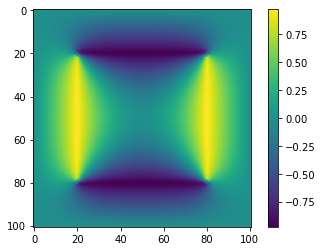

In [1]:
#Exercício 3
import pylab as plt
import numpy as np
M=100 
target=1e-6


phi=np.zeros([M+1,M+1])


phi[20:81, 20] = 1
phi[20:81, 80] = 1
phi[20, 20:81] = -1
phi[80, 20:81] = -1


delta=2*target
w=0.95

while delta>target:
    oldphi=np.copy(phi)
    phi[20:81, 20] = 1
    phi[20:81, 80] = 1
    phi[20, 20:81] = -1
    phi[80, 20:81] = -1
    phi[1:M,1:M]=w*(phi[2:M+1,1:M]+phi[0:M-1,1:M]+phi[1:M,2:M+1]+phi[1:M,0:M-1])/4 +(1-w)*phi[1:M,1:M]
    delta=np.max(abs(phi-oldphi))
plt.imshow(phi)
plt.colorbar()
plt.show()



In [ ]:
#Exeercício 4
#Não fiz